# Лабораторная работа №2
# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.
### выполнил студент группы РТ5-61Б, Робертс Даниил Александрович

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

В качестве набора данных мы будем использовать датасет "Titanic - Machine Learning from Disaster" с данными пассажиров Титаника, взятый с сайта  https://www.kaggle.com/c/titanic/data.

In [4]:
titanic_data=pd.read_csv('C:\data fo py/train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# размер набора данных
titanic_data.shape

(891, 12)

In [8]:
# типы колонок
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
# проверим есть ли пропущенные значения
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
total_count = titanic_data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 891


### Обработка пропусков в данных

Пропуски имеются в колонках возраста, номер каюты и класса пассажира
 - Пропусков в колонке "Cabine" слишком много, поэтому удалим весь столбец.
- Пропуски возраста заполним медианой
 - Пропуски в колонке "Embarkation" заполним наиболее частым значением

In [14]:
titanic_data_1=titanic_data.drop('Cabin', axis=1)

In [17]:
titanic_data_1=titanic_data_1.fillna({'Age': titanic_data_1.Age.median()})

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [29]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(pd.DataFrame(titanic_data_1.Embarked))
data_imp2

array([['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['Q'],
       ['S'],
       ['C'],
       ['C'],
       ['Q'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['Q'],
       ['S'],
       ['Q'],
       ['Q'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
      

In [30]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['C', 'Q', 'S'], dtype=object)

In [31]:
titanic_data_1.Embarked=data_imp2

In [35]:
# Пустые значения отсутствуют
titanic_data_1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Преобразование категориальных признаков в числовые
- Препобразуем колонку пола пассажира в 2 отдельные колонки (one-hot encoding)
- Преобразуем колонку с названием порта посадки "Embarkation" целочисленным значением (label encoding) 

In [55]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [50]:
le = LabelEncoder()

In [56]:
titanic_le=le.fit_transform(titanic_data_1['Embarked'])
np.unique(titanic_le)

array([0, 1, 2], dtype=int64)

In [57]:
titanic_data_2=titanic_data_1
titanic_data_2.Embarked= titanic_le

In [59]:
titanic_data_2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,2


In [102]:
onehot_encoder = OneHotEncoder(sparse=False)

titanic_ohe = pd.DataFrame(onehot_encoder.fit_transform(titanic_data_2[['Sex']]))
titanic_ohe.head()

,0,1
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [109]:
titanic_data_2['Female']=titanic_ohe[0]
titanic_data_2['Male']=titanic_ohe[1]
titanic_data_2=titanic_data_2.drop(['Sex'], axis=1)
titanic_data_2.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Male,Female
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0.0,1.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,2,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,2,1.0,0.0


### Масштабирование данных
Проведём масштабирование колонки "Fare" (цена за проезд)

In [112]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

#### MinMax масштабирование

In [113]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(titanic_data_2[['Fare']])

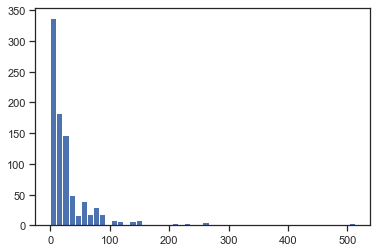

In [114]:
plt.hist(titanic_data_2['Fare'], 50)
plt.show()

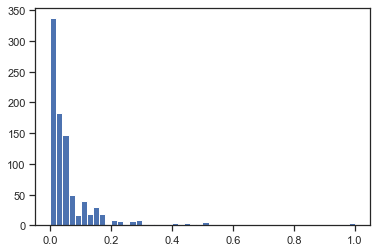

In [115]:
plt.hist(sc1_data, 50)
plt.show()

#### Масштабирование данных на основе Z-оценки - StandardScaler

In [118]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(titanic_data_2[['Fare']])

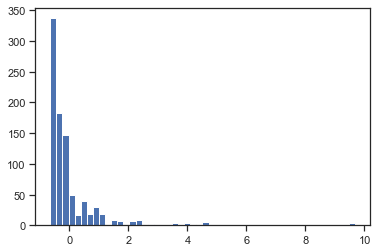

In [119]:
plt.hist(sc2_data, 50)
plt.show()